<a href="https://colab.research.google.com/github/LuisPalma12345/MVS_AG/blob/main/MVS_en_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Máquina de Vector de Soporte embebido en un Algorítmo Genético
```
Versión   : 1.0, Para uso educativo
Autores   : Luis Beltran Palma Ttito
            Javier Arturo Rozas Huacho
Lugar     : Cusco, Perú, 2021.
Proposito : Implementación de una máquina de vector de soporte como función de aptitud del algoritmo genético.
Problema  : Obtención de proporción de elementos químicos en una aleación de metales con cierta dureza.
Algoritmo : La lógica del algoritmo obedece al diagrama de la figura siguiente.
```

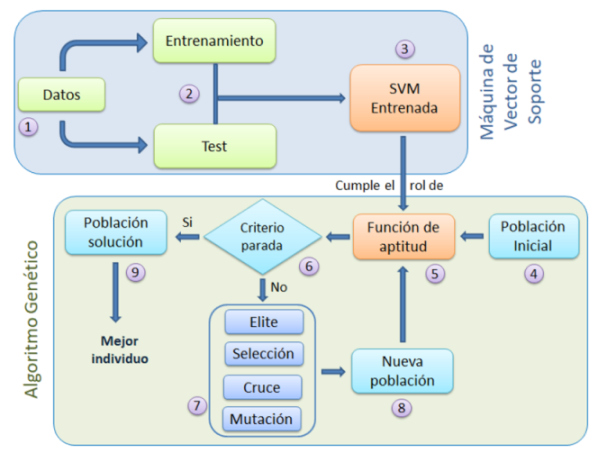

#1. Instalación y carga de librería
```
e1071   : Para el uso de máquina de vector de soporte.
Ga      : Para el uso de algorítmo genético.
knitr   : Para visualización tabular de datos.
```

In [1]:
install.packages("e1071")
install.packages("knitr")
install.packages("GA")
library(e1071)
library(knitr)
library("GA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘RcppArmadillo’


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de




#2. Carga de datos
```
El conjunto de datos utilizados corresponde a 142 muestras de dureza de metal:
-  16 variables de entrada, proporción de elementos químico: carbono, manganeso,
   fósforo, azufre, silicio, titanio, columbio, cromo, boro, aluminio, vanadio, 
   cobre, calcio, níquel, molibdeno, y nitrógeno.
-  1 variable de salida: Dureza brinell de metales (dureza que se mide aplicando
   presión con un bola de acero templado).
-  Datos registrados en formato csv.
```

In [44]:
datos <- read.table(file = "dureza_metal.csv", header = T, sep = ";")
kable(datos)



|     PC|  PMg|    PP|     PS|    Psi|   Pti|   PNb|  PCr|   PBr|   Pal| PV|  Pcu|    PCl|  Pni|   Pmo|     Pn| Dureza|
|------:|----:|-----:|------:|------:|-----:|-----:|----:|-----:|-----:|--:|----:|------:|----:|-----:|------:|------:|
| 235.00| 1.23| 21.00| 0.0079|   0.10| 11.00|  5.00| 0.04| 4e-04| 42.00|  5| 0.03| 0.0032| 0.05| 15.00| 4.0000|    311|
| 242.00| 1.22| 14.00| 0.0047|   0.10| 11.00| 11.00| 0.02| 5e-04| 41.00|  2| 0.01| 0.0024| 0.02|  6.00| 8.0000|    302|
| 234.00| 1.24| 19.00| 0.0058|   0.10| 11.00|  1.00| 0.04| 5e-04| 44.00|  4| 0.02| 0.0017| 0.03|  0.01| 0.0048|    321|
| 252.00| 1.25| 16.00| 7.0000| 101.00| 13.00|  4.00| 0.03| 4e-04| 41.00|  6| 0.03| 0.0035| 0.03| 15.00| 0.0055|    321|
| 227.00| 1.28| 23.00| 0.0072| 103.00| 12.00|  5.00| 0.04| 4e-04| 33.00|  8| 0.02| 0.0022| 0.04| 15.00| 0.0046|    293|
| 241.00| 1.26| 17.00| 8.0000| 104.00| 11.00|  4.00| 0.02| 4e-04| 45.00|  5| 0.03| 0.0022| 0.03|  0.01| 0.0059|    302|
| 245.00| 1.25| 12.00| 0.0044| 105.00|

#3. Entrenamiento de la máquina de véctor de soporte

###3.1. Separación de datos para entrenamiento test
```
En el ejemplo: 70% para entremaniento y 30% para test
```

In [45]:
datos.train.indice <- sample(x = nrow(datos), size = nrow(datos)*0.7)
datos.train <- datos[datos.train.indice,]
datos.test <- datos[-datos.train.indice,]
kable(datos.train)
kable(datos.test)



|    |     PC|  PMg|    PP|     PS|    Psi|   Pti|   PNb|  PCr|   PBr|   Pal| PV|  Pcu|    PCl|  Pni|   Pmo|     Pn| Dureza|
|:---|------:|----:|-----:|------:|------:|-----:|-----:|----:|-----:|-----:|--:|----:|------:|----:|-----:|------:|------:|
|40  | 228.00| 1.26| 19.00| 0.0066| 121.00| 14.00|  1.00| 0.03| 2e-04| 34.00|  3| 0.02| 0.0027| 0.03|  9.00| 0.0008|    311|
|61  |   0.23| 1.23| 16.00| 0.0079|   0.13|  0.01|  1.00| 0.03| 2e-04|  0.04|  2| 0.04| 2.0000| 0.02|  9.00| 0.0056|    302|
|5   | 227.00| 1.28| 23.00| 0.0072| 103.00| 12.00|  5.00| 0.04| 4e-04| 33.00|  8| 0.02| 0.0022| 0.04| 15.00| 0.0046|    293|
|80  | 227.00| 1.24|  0.02| 7.0000|   0.14| 13.00|  3.00| 0.03| 5e-04| 28.00|  8| 0.02| 0.0026| 0.02| 15.00| 0.0056|    302|
|111 | 254.00| 1.24| 17.00| 0.0054|   0.15| 13.00|  1.00| 0.02| 5e-04| 31.00|  3| 0.01| 0.0025| 0.02|  6.00| 0.0038|    311|
|55  | 228.00| 1.26| 16.00| 6.0000| 128.00| 15.00|  3.00| 0.03| 3e-04| 36.00|  5| 0.02| 0.0027| 0.03|  0.01| 0.0044|    302



|    |     PC|  PMg|    PP|     PS|    Psi|   Pti|   PNb|  PCr|   PBr|   Pal| PV|  Pcu|    PCl|  Pni|   Pmo|     Pn| Dureza|
|:---|------:|----:|-----:|------:|------:|-----:|-----:|----:|-----:|-----:|--:|----:|------:|----:|-----:|------:|------:|
|9   | 246.00| 1.28| 17.00| 0.0077| 106.00| 13.00|  6.00| 0.03| 4e-04| 38.00|  6| 0.02| 2.0000| 0.03|  0.01| 5.0000|    311|
|13  | 232.00| 1.21| 16.00| 8.0000| 111.00| 11.00|  4.00| 0.03| 3e-04| 31.00|  5| 0.11| 0.0023| 0.04|  0.01| 0.0056|    302|
|14  |   0.23| 1.26| 12.00| 0.0065| 112.00|  9.00|  2.00| 0.02| 3e-04| 37.00|  3| 0.01| 0.0029| 0.03|  5.00| 0.0057|    293|
|16  | 251.00| 1.33| 14.00| 0.0039| 113.00| 14.00|  1.00| 0.04| 2e-04| 36.00|  3| 0.03| 0.0024| 0.03| 15.00| 0.0056|    302|
|18  | 235.00| 1.26| 15.00| 0.0061| 113.00| 13.00|  1.00| 0.02| 5e-04| 46.00|  2| 0.02| 0.0017| 0.03| 12.00| 0.0059|    293|
|19  | 236.00| 1.22|  9.00| 0.0055| 114.00|  0.01|  1.00| 0.01| 1e-04| 33.00|  2| 0.02| 0.0022| 0.03|  8.00| 7.0000|    311

### Parametros de la máquina de vector de soporte
```
Cost  : Penalización por violar el margen.
Gamma : Un menor gamma implica una mayor distancia entre 
        las observaciones que separan los subespacios del SVM 
        luego la estimación es más conservadora, sin embargo 
        un mayor parámetro "fastidia" a la función kernel.
kernel: Función kernel a utilizar: linear, polynomial, 
        radial, sigmoid.
scale : Normaliza los datos
```

###3.2. Entrenamiento de la máquina de véctor de soporte
```
La función tune realiza entrenamiento de cuadrícula (combinando diferentes 
valores de los parametros: gamma, cost y kernel, hasta obtener el trio que 
optimice la máquina).
Aplica validación cruzada de 10 particiones.
```

In [46]:
modelo <- tune(svm, Dureza~., data = datos.train,
               ranges = list(gamma = 2^(0:4), cost = 2^(2:4),
               kernel = c('linear','polynomial','radial','sigmoid')),
               tunecontrol = tune.control(cross = 10))

###3.3. Recuperación del mejor modelo 

In [47]:
mejor_modelo <- modelo$best.model
mejor_modelo


Call:
best.tune(method = svm, train.x = Dureza ~ ., data = datos.train, 
    ranges = list(gamma = 2^(0:4), cost = 2^(2:4), kernel = c("linear", 
        "polynomial", "radial", "sigmoid")), tunecontrol = tune.control(cross = 10))


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  8 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  77


###3.4. Gráfica del hiperplano de separación de datos de entrenamiento

In [48]:
# No funciona plot en google colab, debe probar en R o RStudio.
plot(mejor_modelo, datos.train)

###3.5. Predicción con datos de test

In [49]:
ypred = predict(mejor_modelo,datos.test)
ypred

9       13       14       16       18       19       22       26 
306.3366 294.1891 306.3366 306.3365 306.7283 306.3366 309.8147 309.8152 
      27       28       29       30       33       34       36       37 
319.8135 294.1845 306.2584 309.8138 306.3365 306.3394 306.3365 306.3358 
      38       50       54       57       58       60       66       67 
309.8115 309.8144 306.3366 306.3422 309.8141 306.3364 306.3218 306.3366 
      71       83       84       85       87       97      100      101 
309.8163 306.3366 306.3366 306.3366 306.4095 306.3368 306.1189 306.1189 
     113      120      121      125      126      128      129      130 
278.1851 303.1848 306.2584 306.3365 306.3394 287.1801 306.3364 303.1847 
     135      136      140 
319.8140 330.8144 306.2584

###3.6. Función que implementa R2 y R2 ajustado.
```
Las funciones matemáticas correspondene a R2 y R2 ajustado.
Implementados en la función de la sección siguiente
```

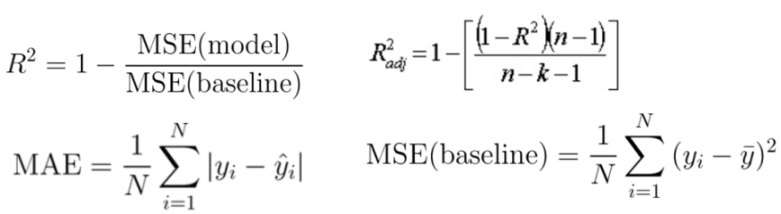

In [50]:
R2_R2_Ajustado <- function(pred,y){
    
    N <- length(y)
    media <- sum(y)/N
    
    suma_modelo <- 0
    suma_lineabase <- 0
    for (i in 1:N){
        suma_modelo <- suma_modelo + (y[i] - pred[i])^2
        suma_lineabase <- suma_lineabase + (y[i] - media)^2
    }
    RDos <- 1 -  (suma_modelo/suma_lineabase)
    RDosA <- 1 - ((N-1)/(N-16-1) * (1-RDos))
    return(list(R2 = RDos, R2ajustado = RDosA))
}

###3.7. Predicción con datos de test. Y obtención de R2 y R2 ajustado

In [51]:
R2 <- R2_R2_Ajustado(ypred,datos.test$Dureza)
R2

$R2
        9 
0.3958156 

$R2ajustado
        9 
0.0240098

###3.8. Predicciones de la máquina de vector de soporte entrenada

In [52]:
nuevo <- data.frame(PC=0.230,PMg=1.26,PP=0.0012,PS=0.0063, Psi=0.112, Pti=0.008,
                    PNb=0.002,PCr=0.02,PBr=3e-04,Pal=0.037,PV=0.003,Pcu=0.01,
                    PCl=0.0022,Pni=0.03,Pmo=0.005,Pn=0.0052);
predict(mejor_modelo,new = nuevo, type = "prob")

1 
306.3366

#4. Implementación de la función de  aptitud
```
Implementación de la función de aptitud, mediante la máquina 
de vector de soporte entrenada.
```

In [53]:
Aptitud <- function(Nuevo){
    x_dato <- matrix(data=Nuevo, nrow = 1, ncol = 16)
    pred <- predict(mejor_modelo, x_dato)
    return(pred)
}

###4.1. Verificación de funcionamiento de función de aptitud

In [54]:
Aptitud(c(0.230,1.26,0.0012,0.0063,0.112,0.008,0.002,0.02,3e-04,0.037,0.003,0.01,
                    0.0022,0.03,0.005,0.0052))

1 
306.3366

#5. Implementación de algoritmo genético

###5.1. Ejecución de Algoritmo Genético.

In [55]:
AG <- ga(
    # Indica que debe manejar números reales
    type = "real-valued",   
    # Asignación de la función de aptitud que utilizara el algoritmo genético
    fitness = Aptitud,     
    # Valores mínimos de cada gen del cromosoma
    lower = c(0.22,1.21,0.01,0.0027,0.1,0.01,0.01,0.01,0.0001,0.03,1,0.01,0.0012,0.01,0.01,0),
    # Valores máximos de cada gen del cromosoma
    upper = c(254,1.33,23,8,148,18,14,0.05,0.0005,51,57,0.11,4,0.05,15,8),
    # Probabilidade de cruce 
    pcrossover = 0.9, 
    # Probabilidad de mutación
    pmutation = 0.05,
    # Cantidad de individuos de la élite 
    elitism = 2,
    # Tamaño de la población
    popSize = 100,
    # Cantidad de epocas o iteraciones
    maxiter = 50)

###5.2. Resultados de ejecución del algorítmo genético

```
Gráfica de evolución de la aptitud o fitness del algrítmo genético
```

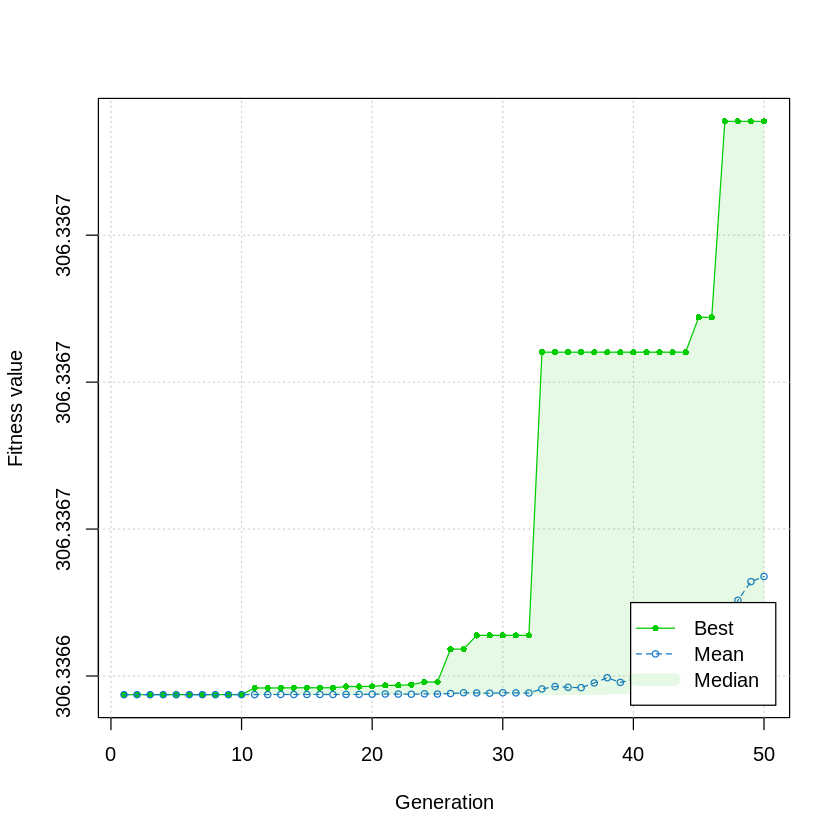

In [56]:
plot(AG)

```
Resumen de a ejecución del algoritmo genético
```

In [57]:
summary(AG)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  100 
Number of generations =  50 
Elitism               =  2 
Crossover probability =  0.9 
Mutation probability  =  0.05 
Search domain = 
          x1   x2    x3     x4    x5    x6    x7   x8    x9   x10  ...    x15
lower   0.22 1.21  0.01 0.0027   0.1  0.01  0.01 0.01 1e-04  0.03        0.01
upper 254.00 1.33 23.00 8.0000 148.0 18.00 14.00 0.05 5e-04 51.00       15.00
      x16
lower   0
upper   8

GA results: 
Iterations             = 50 
Fitness function value = 306.3368 
Solution = 
           x1       x2      x3      x4       x5       x6       x7         x8
[1,] 163.9172 1.255844 14.3597 3.82756 67.83386 8.804126 5.620394 0.03317954
               x9      x10  ...       x15      x16
[1,] 0.0002734363 23.42804       8.865741 1.457531

```
Obtención de la soluciones óptimas o cercanas al óptimo del algorítmo genético
```

In [58]:
pred_ag <- round(Aptitud(AG@solution),2)
round(AG@solution,2)
pred_ag

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
163.92,1.26,14.36,3.83,67.83,8.8,5.62,0.03,0,23.43,8.48,0.02,1.62,0.03,8.87,1.46


1 
306.34

#6. Función que recopila soluciones de N ejecuciones del algoritmo genético
```
La función que ejecuta N veces el algoritmo genético y recopila las soluciones 
obtenidas. Con el fin de contar con diferentes combinaciones de elementos 
químicos para una dureza de metal.
```

In [59]:
N_Combinaciones <- function(N){
    Dat <- data.frame(PC=0.0,PMg=0.0,PP=0.0,PS=0.0, Psi=0.0, Pti=0.0,
                    PNb=0.0,PCr=0.0,PBr=0.0,Pal=0.0,PV=0.0,Pcu=0.0,
                    PCl=0.0,Pni=0.0,Pmo=0.0,Pn=0.0,Dureza=0);
    M <- matrix(data=Dat, nrow = 1, ncol = 17)
    for (i in 1:N){
        AG <- ga(
            type = "real-valued", 
            fitness = Aptitud,
            lower = c(0.22,1.21,0.01,0.0027,0.1,0.01,0.01,0.01,0.0001,0.03,1,0.01,0.0012,0.01,0.01,0),
            upper = c(254,1.33,23,8,148,18,14,0.05,0.0005,51,57,0.11,4,0.05,15,8), 
            pcrossover = 0.9,
            pmutation = 0.01,
            elitism = 2,
            popSize = 20,
            maxiter = 100)
        M <- rbind(M,cbind(round(AG@solution,2),Dureza=round(Aptitud(AG@solution),2)))
    }
    return(M)
}

###6.1. Obtención de resultados de 5 ejecuciones del algoritmo genético.
```
La ejecución, obtiene diferentes combinaciones de elementos químicos para una misma dureza de metal.
```

In [60]:
Solucion <- kable(N_Combinaciones(5))
Solucion



|   |x1     |x2   |x3    |x4   |x5     |x6    |x7   |x8   |x9 |x10   |x11   |x12  |x13  |x14  |x15   |x16  |Dureza |
|:--|:------|:----|:-----|:----|:------|:-----|:----|:----|:--|:-----|:-----|:----|:----|:----|:-----|:----|:------|
|   |0      |0    |0     |0    |0      |0     |0    |0    |0  |0     |0     |0    |0    |0    |0     |0    |0      |
|   |190.59 |1.28 |7.61  |5.02 |77.53  |10.14 |8.69 |0.04 |0  |34.87 |36.43 |0.05 |1.79 |0.03 |7.41  |4.18 |306.34 |
|   |190.59 |1.28 |7.61  |5.02 |94.36  |10.14 |8.69 |0.04 |0  |34.87 |36.43 |0.05 |1.79 |0.03 |7.41  |4.18 |306.34 |
|   |190.59 |1.28 |7.61  |5.02 |87.54  |10.14 |8.69 |0.04 |0  |34.87 |36.43 |0.05 |1.79 |0.03 |7.41  |4.18 |306.34 |
|   |190.59 |1.28 |7.61  |5.02 |87.45  |10.14 |8.69 |0.04 |0  |34.87 |36.43 |0.05 |1.79 |0.03 |7.41  |4.18 |306.34 |
|   |190.59 |1.28 |7.61  |5.02 |77.53  |10.14 |8.69 |0.04 |0  |34.87 |36.43 |0.05 |1.79 |0.03 |7.41  |4.18 |306.34 |
|   |190.59 |1.28 |7.61  |5.02 |91.13  |10.14 |8.69 |0.04 |0  

## CONCLUSIÓN
El propósito de la presente implementación, fue conseguir diferentes combinaciones de elementos químicos que producen la misma dureza de metal. Objetivo que fue alcanzado, como se aprecia en la tabla anterior.